In [68]:
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import copy
from collections import Counter
import seaborn as sns
import re

In [85]:
colormap = "Purples"
fontsize = 28

In [70]:
def num2key(string): #gives the equivalent of the number in the key of C
    return (string.replace('10','A#')
            .replace('1','C#')
            .replace('3','D#')
            .replace('6','F#')
            .replace('8','G#')
            .replace('9','A')
            .replace('11','B')
            .replace('0','C')
            .replace('2','D')
            .replace( '4','E')
            .replace('5','F')
            .replace('7','G'))

In [71]:
# Loading the data from the pre-processing part
clean_data = np.load('../dataset/clean_data.npy')
removed_duplicates = np.load('../dataset/removed_duplicates.npy')

In [72]:
def moving_average(X):
    '''
    Helper function to compute the smoothed sequence X using a moving average.
    '''
    N = 10
    augmented_X = tuple([X[0] for i in range(5)]) + X + tuple([X[-1] for i in range(4)])
    res = np.convolve(augmented_X, np.ones((N,))/N, mode='valid')
    return res

## Analysis on n-grams

In [86]:
# General function for computing and plotting n-grams

def plot_n_grams(clean_data, ng,n, a=0 ):
    """
    This function computes and plots the n-grams of our clean data.
    clean_data is our input data
    ng is the number of chords we want in our sequences

    a is the first point you would like to plot
    """
    copyclean=copy.deepcopy(clean_data)
    for elem in copyclean:
        for e in elem[5]:
            e[0]=num2key(e[0])

    ngrams = []
    
    for k in range(890):
        for m in range(copyclean[k][5].shape[0] - ng + 1):
            ngrams.append(tuple([copyclean[k][5][m+o][0] for o in range(ng)]))    
            
    really_plot_ngrams(ngrams,n,ng)

def really_plot_ngrams(ngrams, n,ng,a=0):
    #n is the number of n-grams we want to plot
    
    
    c_gram = Counter(ngrams)
    mc_grams = [c_gram.most_common(n+a)[k][0] for k in range(a,a+n)]
    mc_grams_counts = [c_gram.most_common(n+a)[k][1] for k in range(a,a+n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_grams_counts)
    plt.xticks(np.arange(n), mc_grams)
    plt.xlabel('{}-grams of chords'.format(ng))
    plt.ylabel('Number of those {}-grams in songs'.format(ng))
    plt.title('Most used {}-gram of chords'.format(ng))
    plt.show()
    
# General function for computing and plotting n-grams

def plot_n_grams_many(clean_data, ng, n, a=0 ):#cleaner plot for general shape
    """
    This function computes and plots the n-grams of our clean data.
    clean_data is our input data
    ng is the number of chords we want in our sequences
    n is the number of n-grams we want to plot
    a is the first point you would like to plot
    """

    ngrams = []
    copyclean=copy.deepcopy(clean_data)

    
    for k in range(890):
        for m in range(copyclean[k][5].shape[0] - ng + 1):
            ngrams.append(tuple([copyclean[k][5][m+o][0] for o in range(ng)]))          

    c_gram = Counter(ngrams)
    mc_grams = [c_gram.most_common(n+a)[k][0] for k in range(a,a+n)]
    mc_grams_counts = [c_gram.most_common(n+a)[k][1] for k in range(a,a+n)]
    log_mc_grams_counts = np.log(mc_grams_counts) # log scale for y axis
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),log_mc_grams_counts)

    plt.xlabel('{}-grams of chords'.format(ng), fontsize=fontsize)
    plt.ylabel('Log-scale frequency'.format(ng), fontsize=fontsize)
    plt.xscale('log') # log scale also for x axis
    plt.show()


def plot_n_grams_diff(clean_data, ng, n, a=0 ):#cleaner plot for general shape
    """
    This function computes and plots the n-grams of our clean data.
    clean_data is our input data
    ng is the number of chords we want in our sequences
    n is the number of n-grams we want to plot
    a is the first point you would like to plot
    """

    ngrams = []
    copyclean=copy.deepcopy(clean_data)

    
    for k in range(890):
        for m in range(copyclean[k][5].shape[0] - ng + 1):
            truc=tuple([copyclean[k][5][m+o][0] for o in range(ng)])
            if len(truc)==len(set(truc)): #checks that every chord is different in the ngram
                ngrams.append(truc)

    c_gram = Counter(ngrams)
    mc_grams = [c_gram.most_common(n+a)[k][0] for k in range(a,a+n)]
    mc_grams_counts = [c_gram.most_common(n+a)[k][1] for k in range(a,a+n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_grams_counts)
    plt.xticks(np.arange(n), mc_grams)
    plt.xlabel('{}-grams of chords'.format(ng), fontsize=fontsize)
    plt.ylabel('Number of those {}-grams in songs'.format(ng), fontsize=fontsize)
    plt.show()
    
def plot_n_grams_decade(clean_data, ng, n, a=0 ):#cleaner plot for general shape
    """
    This function computes and plots the n-grams of our clean data.
    clean_data is our input data
    ng is the number of chords we want in our sequences
    n is the number of n-grams we want to plot
    a is the first point you would like to plot
    """

    ngrams = []
    
    for bobo in range(5,10):
    
        # Look at one decade at the time only
        regex = re.compile(f'.*/19{bobo}.')
        decade_data = np.stack([string for string in clean_data if re.match(regex, string[1])])


        for k in range(len(decade_data)):
            for m in range(decade_data[k][5].shape[0] - ng + 1):
                ngrams.append(tuple([decade_data[k][5][m+o][0] for o in range(ng)]))          

        c_gram = Counter(ngrams)
        mc_grams = [c_gram.most_common(n+a)[k][0] for k in range(a,a+n)]
        mc_grams_counts = [c_gram.most_common(n+a)[k][1] for k in range(a,a+n)]
        log_mc_grams_counts = np.log(mc_grams_counts) # log scale for y axis

        plt.figure(1, figsize=(15,7))

        plt.stem(np.arange(n),log_mc_grams_counts, linefmt=' ', markerfmt='-', basefmt=' ')
        plt.legend([f'19{bobo}'])

    plt.xlabel('{}-grams of chords for each decade'.format(ng), fontsize=fontsize)
    plt.ylabel('Log-scale frequency'.format(ng), fontsize=fontsize)
    plt.xscale('log') # log scale also for x axis
    plt.show()

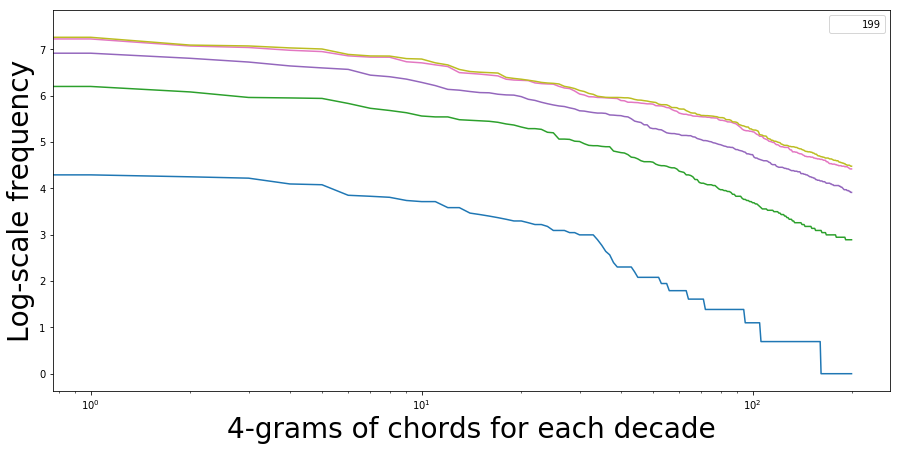

In [87]:
# Evolution of rank freqency for each decade
ngrams = plot_n_grams_decade(clean_data,4,200,2)

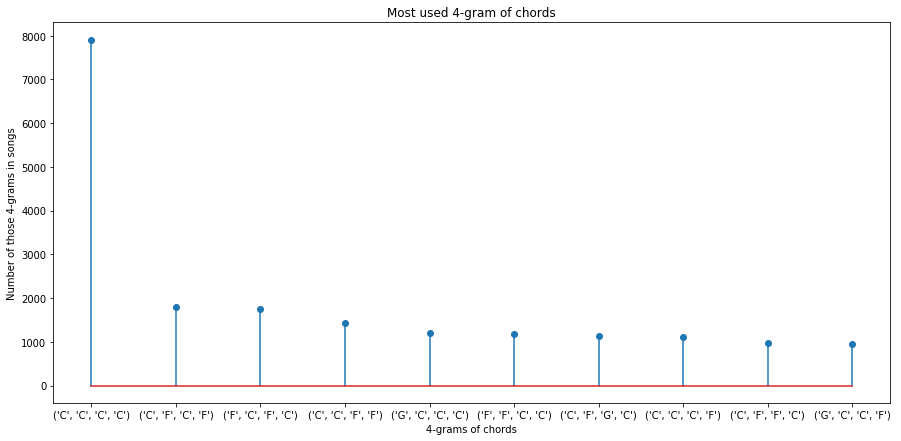

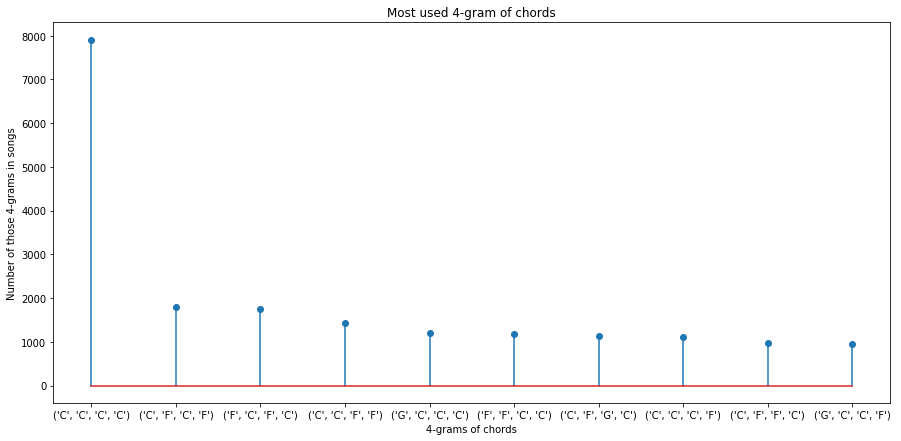

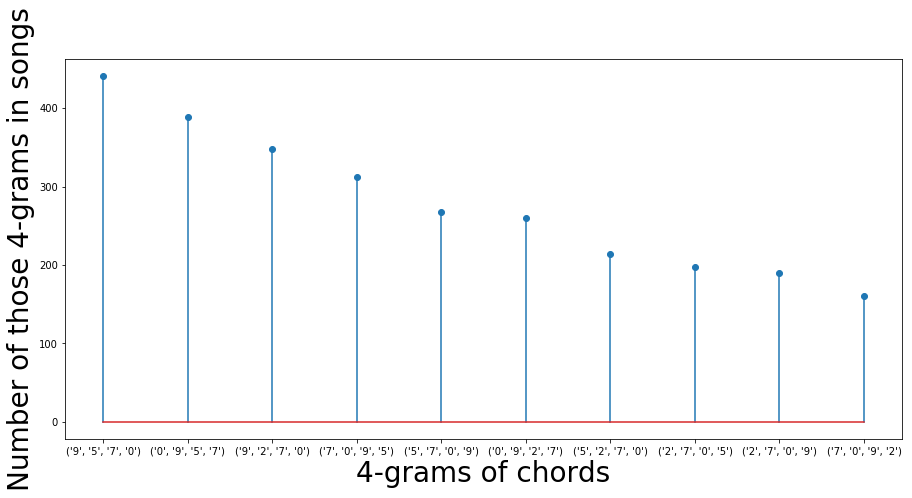

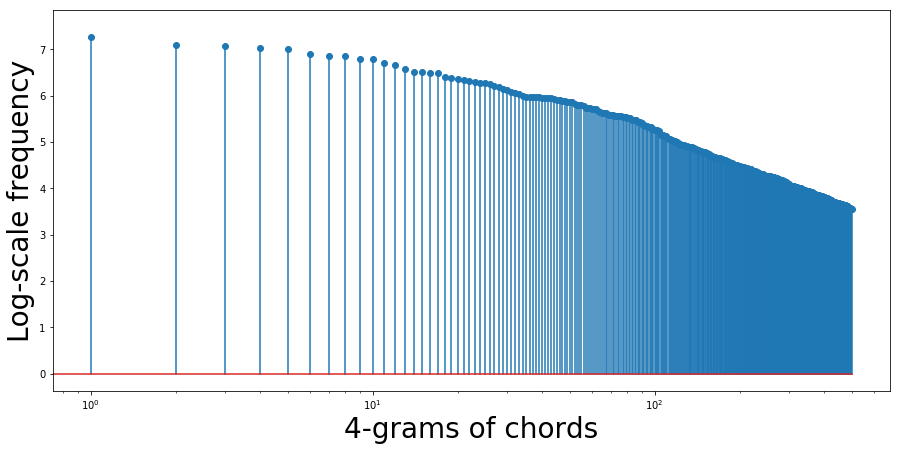

In [88]:
ngrams = plot_n_grams(clean_data,4,10)
ngrams = plot_n_grams(clean_data, 4, 10,18)
ngrams = plot_n_grams_diff(clean_data, 4, 10)
ngrams = plot_n_grams_many(clean_data,4,500,2)

What do we observe? It is not linear, and so the power-law model does not fit.

## Removing Cycles in the n-grams

In [89]:
# This function checks if the two patterns are indeed the same to a cycle rotation
def same_pattern(patA, patB):
    cycle_list = [patA[x:] + patA[:x] for x in range(len(patA))]
    
    for ele in cycle_list:
        if (ele == patB):
            return True
    return False

In [90]:
same_pattern(('0', '4', '5', '3'), ('4', '5', '3', '0'))

True

In [91]:
# Let's define the pattern ngrams with taking into account possible cycles in the patterns
def remove_cycles(clean_data):
    
    ngrams = []
    copyclean = copy.deepcopy(clean_data)

    ng = 4

    # Normal n-grams creation
    for k in range(890):
        for m in range(copyclean[k][5].shape[0] - ng + 1):
            ngrams.append(tuple([copyclean[k][5][m+o][0] for o in range(ng)]))     

    c_gram = Counter(ngrams)
    mc_grams = c_gram.most_common()

    # We now group the patterns that are the same to a cycle rotation près
    h = 0

    # We use while loops, as for loops are less flexible in terms of conditions
    while(h < len(mc_grams)):
        d = 0
        hlim = h
        while(d < hlim):
            if h != d and h < len(mc_grams):
                if same_pattern(mc_grams[h][0], mc_grams[d][0]):
                    mc_grams[d] = (mc_grams[d][0], (mc_grams[h][1] + mc_grams[d][1]))
                    mc_grams.pop(h)
                    d -= 1
                    hlim -= 1
            d += 1
        h += 1
        
    mc_grams = sorted(mc_grams, key = lambda x: x[1], reverse = True)
    
    # What we return is the mc_grams object with all patterns that are the same grouped together
    return mc_grams

mc_grams_data = remove_cycles(removed_duplicates)

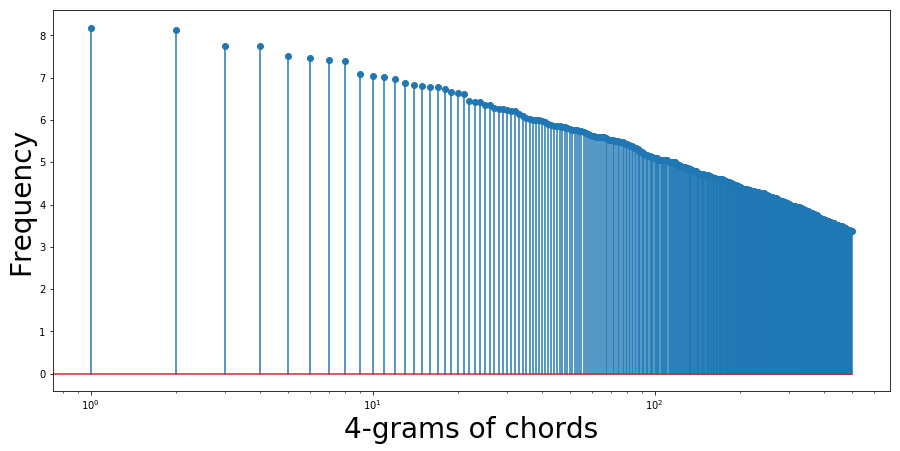

In [92]:
def plot_n_grams_many_without_cycles(clean_data, ng, n, a=0 ):#cleaner plot for general shape
    """
    This function computes and plots the n-grams of our clean data.
    clean_data is our input data
    ng is the number of chords we want in our sequences
    n is the number of n-grams we want to plot
    a is the first point you would like to plot
    """

    ngrams = []
    copyclean=copy.deepcopy(clean_data)

    c_gram = remove_cycles(copyclean)

    mc_grams = [c_gram[k][0] for k in range(a,a+n)]
    mc_grams_counts = [c_gram[k][1] for k in range(a,a+n)]
    log_mc_grams_counts = np.log(mc_grams_counts) # log scale for y axis
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),log_mc_grams_counts)

    plt.xlabel('{}-grams of chords'.format(ng), fontsize=fontsize)
    plt.ylabel('Frequency', fontsize=fontsize)
    plt.xscale('log') # log scale also for x axis
    plt.show()
    
    return ngrams

ngrams= plot_n_grams_many_without_cycles(clean_data,4,500,2)

In [93]:
diff_bigrams = [int(clean_data[k][5][m+1][0]) - int(clean_data[k][5][m][0]) for k in range(890) for m in range(clean_data[k][5].shape[0] - 1) ]

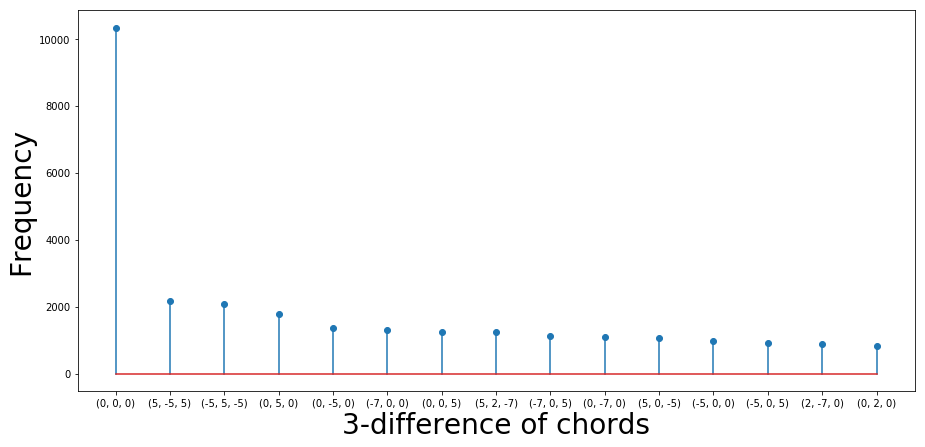

In [127]:
# General function for computing and plotting n-differences

def plot_diff_grams(clean_data, ng, n):
    """
    This function computes and plots the diff-grams of our clean data.
    clean_data is our input data
    ng is the number of chords we want in our sequences
    n is the number of n-grams we want to plot
    """
    
    diffgrams = []
    
    for k in range(890):
        for m in range(clean_data[k][5].shape[0] - ng+1):
            diffgrams.append(tuple([int(clean_data[k][5][m+o+1][0]) - int(clean_data[k][5][m+o][0]) for o in range(ng-1)]))          

    c_gram = Counter(diffgrams)

    mc_dgrams = [c_gram.most_common(n)[k][0] for k in range(n)]
    mc_dgrams_counts = [c_gram.most_common(n)[k][1] for k in range(n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_dgrams_counts)
    plt.xticks(np.arange(n), mc_dgrams)
    plt.xlabel('{}-difference of chords'.format(ng-1), fontsize=fontsize)
    plt.ylabel('Frequency'.format(ng-1), fontsize=fontsize)
    # plt.title('Most used {}-difference of chords in semitones'.format(ng-1))
    plt.show()
    
    
plot_diff_grams(clean_data, 4, 15)

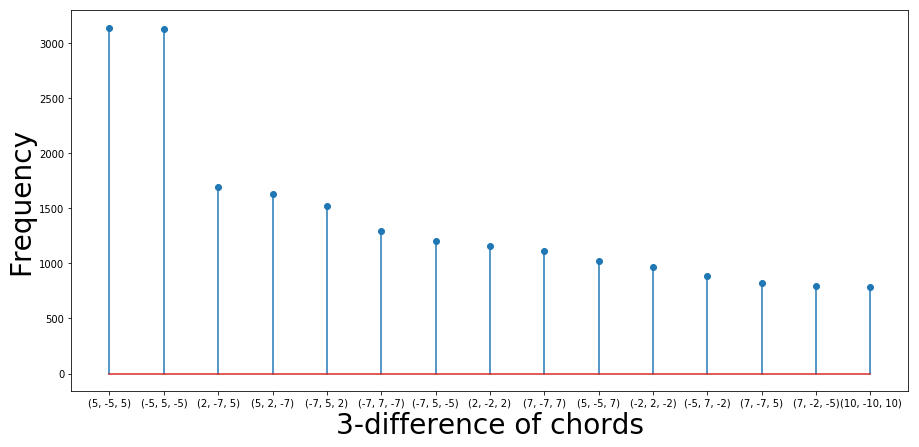

In [128]:
plot_diff_grams(removed_duplicates, 4, 15)

Let us precise that the term diff-gram was invented by us as it is a derivation from the term n-gram but for the case of interval differences between two subsequent chords.
Instead of considering the n-grams being the sequence of chords, we consider here the intervals between chords as our elements of the sequence, hence the name "diff-gram".

## Heatmaps with all chords

In [102]:
# General function for computing and plotting n-differences in heatmap hashion

def plot_heatmap(clean_data, cycles=True):
    """
    This function computes and plots the diff-grams of our clean data onto a heatmap.
    clean_data is our input data
    We take ng = 3 here, as we want to plot sequences of two consecutive intervals
    n is not defined here, as we want to plot all the n-grams possible
    """
        
    ng = 3
    # This numpy array will store the data for the 
    heatmap_data = np.zeros((12, 12))

    for k in range(len(clean_data)):
        for m in range(clean_data[k][5].shape[0] - ng+1):
            #current_gram = tuple([int(clean_data[k][5][m+o+1][0]) - int(clean_data[k][5][m+o][0]) for o in range(ng-1)])  
            current_gram=[]
            for o in range(ng-1):
                diff=int(clean_data[k][5][m+o+1][0]) - int(clean_data[k][5][m+o][0]) +4 #+4 so that 0,0 index is at 4,4
                if  diff > 7:
                    current_gram.append(diff - 12)
                else:
                    if diff <= -5:
                        current_gram.append(diff + 12)
                    else:
                        current_gram.append(diff)

                
                
            index_first = current_gram[0]
            index_second = current_gram[1]

            heatmap_data[index_second, index_first] += 1
    
    plt.figure(1, figsize=(19, 8))
    
    plt.subplot(121) # Left plot
    sns.heatmap(heatmap_data,vmin=0,vmax=15000 ,cmap=colormap)
    plt.xticks(np.arange(0.5, 13.5, 1), np.arange(-4, 8), fontsize=fontsize)
    plt.yticks(np.arange(0.5, 13.5, 1), np.arange(-4, 8), fontsize=fontsize)
    plt.xlabel('Second Interval', fontsize=2*fontsize)
    plt.ylabel('First Interval',fontsize=2*fontsize)
    #plt.title('Heatmap for trigrams')
    #if(cycles==True):
        #plt.title('Heatmap for trigrams')
    #else:
        #plt.title('Heatmap for trigrams with cycles removed')
    
    plt.subplot(122) # Right plot (logarithmic)
    sns.heatmap(np.maximum(np.log(heatmap_data), 0), cmap=colormap)
    plt.xticks(np.arange(0.5, 13.5, 1), np.arange(-4, 8), fontsize=fontsize)
    plt.yticks(np.arange(0.5, 13.5, 1), np.arange(-4, 8), fontsize=fontsize)
    plt.xlabel('Second Interval', fontsize=2*fontsize)
    plt.ylabel('First Interval', fontsize=2*fontsize)
    #if(cycles==True):
        #plt.title('Logarithmic heatmap for trigrams')
    #else:
        #plt.title('Logarithmic heatmap for trigrams with cycles removed')
    
    plt.show()

C:\Users\Spouep\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


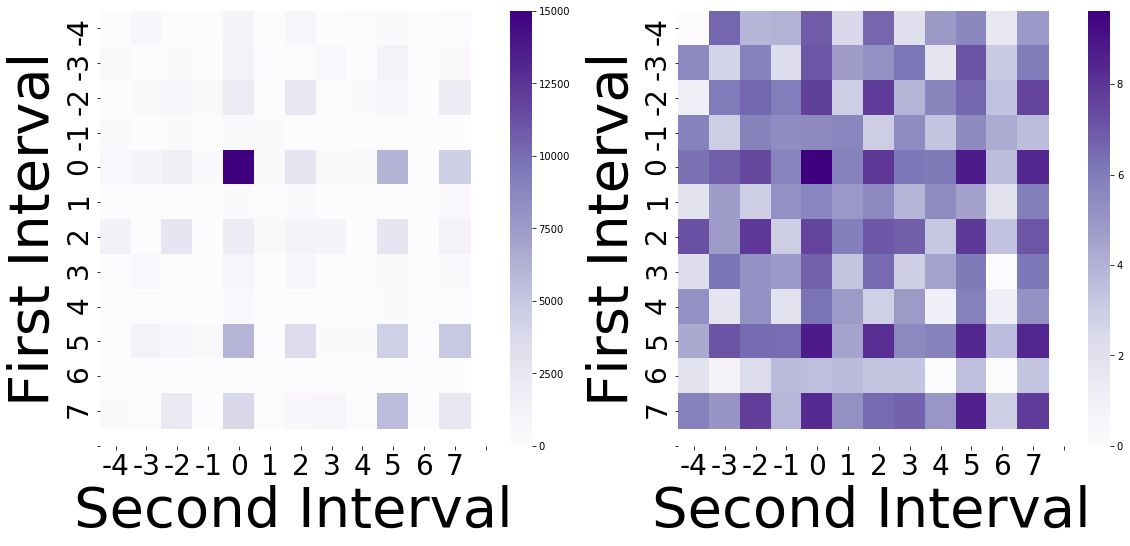

In [103]:
plot_heatmap(clean_data)

## Heatmaps with repetitions removed

C:\Users\Spouep\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


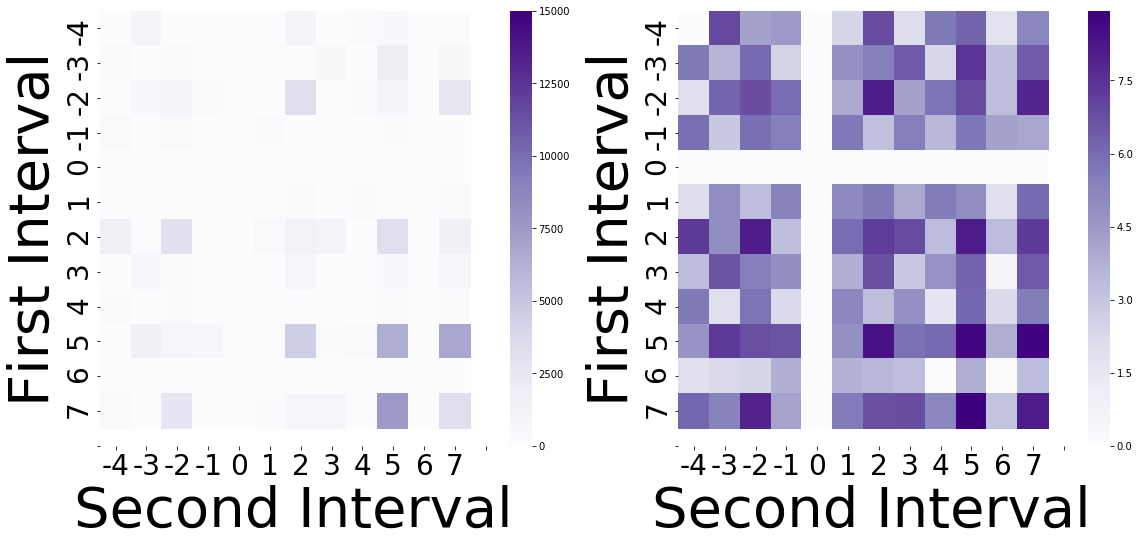

In [104]:
plot_heatmap(removed_duplicates, cycles=False)

Here we removed the duplicates, resulting in a heatmap with 0 on the row 0 and column 0.

## Heatmap for each decade

In [121]:
# General function for computing and plotting n-differences in heatmap hashion
import re

def plot_heatmap_decade(clean_data, cycles=True):
    """
    This function computes and plots the diff-grams of our clean data onto a heatmap.
    clean_data is our input data
    We take ng = 3 here, as we want to plot sequences of two consecutive intervals
    n is not defined here, as we want to plot all the n-grams possible
    """
    
    ng = 3
    heatmaps = []
    heatmapsrel = []
    chordlens=[]
        
    for bobo in range(5,10):
    
        # This numpy array will store the data for the 
        heatmap_data = np.zeros((12,12))
        
        # Look at one decade at the time only
        regex = re.compile(f'.*/19{bobo}.')
        decade_data = np.stack([string for string in clean_data if re.match(regex, string[1])])
        chordpatslen=0
        for k in range(len(decade_data)):
            for m in range(decade_data[k][5].shape[0] - ng+1):
                current_gram=[]
                for o in range(ng-1):
                    diff=int(decade_data[k][5][m+o+1][0]) - int(decade_data[k][5][m+o][0]) +4 #+4 so that 0,0 index is at 4,4
                    if  diff > 7:
                        current_gram.append(diff - 12)
                    else:
                        if diff <= -5:
                            current_gram.append(diff + 12)
                        else:
                            current_gram.append(diff)      
                index_first = current_gram[0] 
                index_second = current_gram[1] 

                heatmap_data[index_second, index_first] += 1
                chordpatslen=chordpatslen+ng-1

        plt.figure(1, figsize=(19, 8))
        
        plt.subplot(121) # Left plot
        sns.heatmap(heatmap_data,vmin=0,vmax=5000 ,cmap=colormap)
        plt.xticks(np.arange(0.5, 13.5, 1), np.arange(-4, 8), fontsize=fontsize)
        plt.yticks(np.arange(0.5, 13.5, 1), np.arange(-4, 8), fontsize=fontsize)
        plt.xlabel('Second Interval', fontsize=2*fontsize)
        plt.ylabel('First Interval', fontsize=2*fontsize)
        #if(cycles==True):
            #plt.title('Absolute Heatmap')
        #else:
            #plt.title('Heatmap for trigrams with cycles removed')       

        plt.subplot(122) # Right plot HEATMAP RELATIVE
        sns.heatmap(heatmap_data/chordpatslen, vmin=0,vmax=0.1, cmap=colormap)
        plt.xticks(np.arange(0.5, 13.5, 1), np.arange(-4, 8), fontsize=fontsize)
        plt.yticks(np.arange(0.5, 13.5, 1), np.arange(-4, 8), fontsize=fontsize)
        plt.xlabel('Second Interval', fontsize=2*fontsize)
        plt.ylabel('First Interval', fontsize=2*fontsize)
        #plt.axis('off')
        #plt.title(f'Relative Heatmap')
        plt.show()
        
                
        heatmapsrel.append(heatmap_data/chordpatslen)# we store all heatmaps together
        chordlens.append(chordpatslen)
        heatmaps.append(heatmap_data)
        
    return heatmaps, heatmapsrel, chordlens     

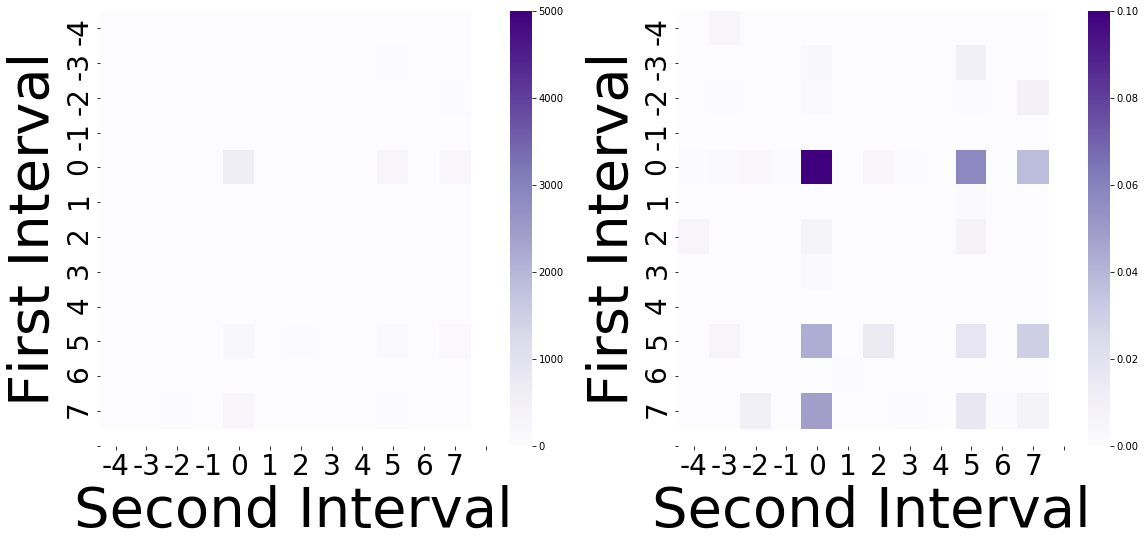

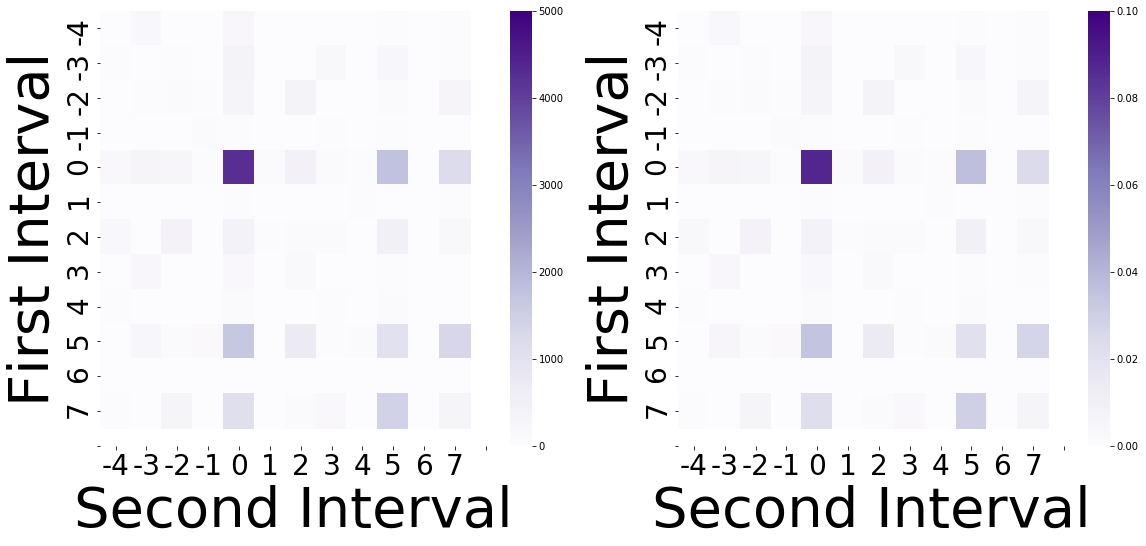

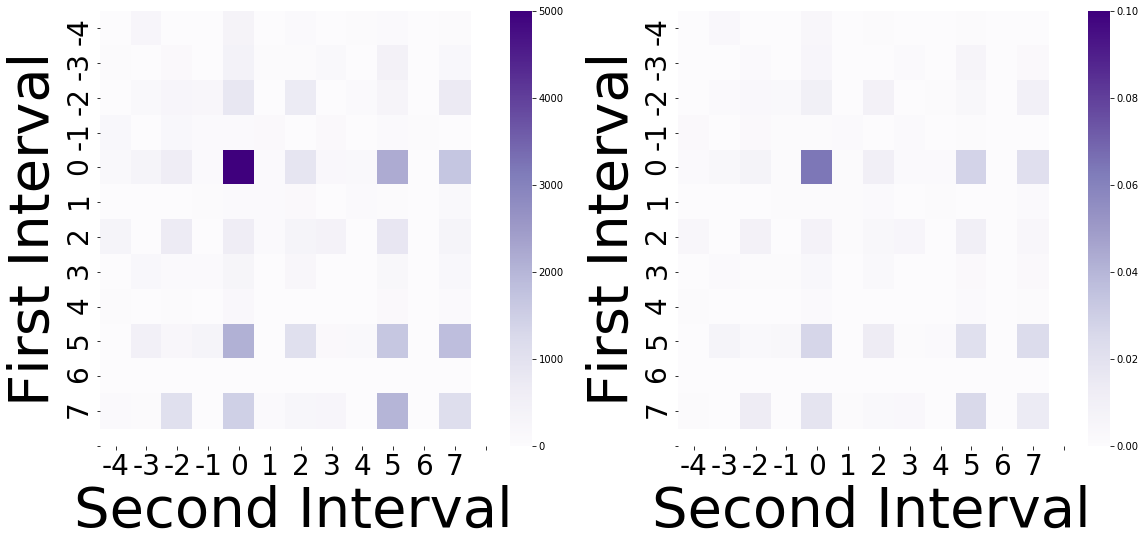

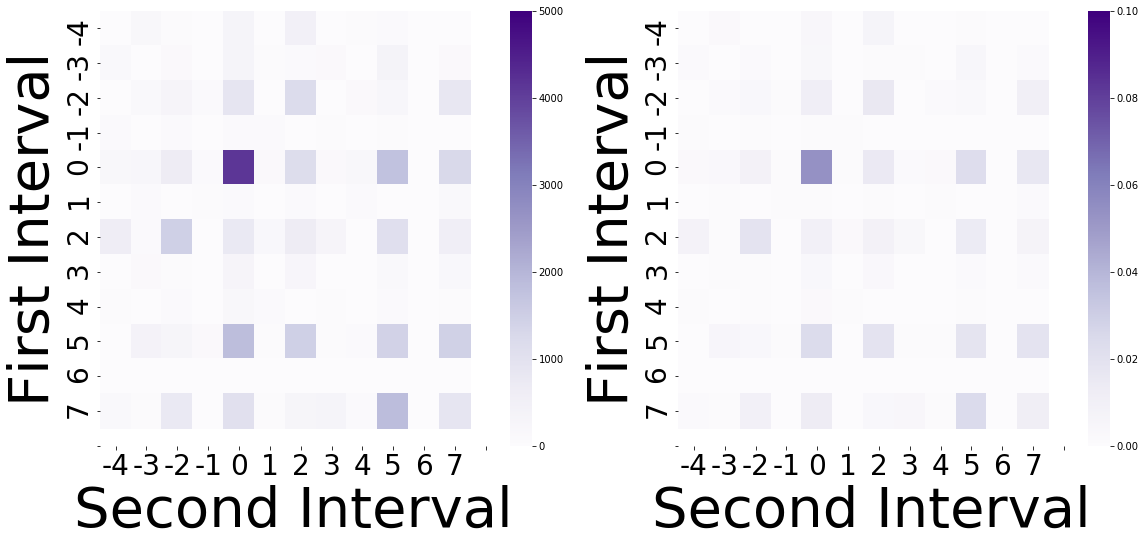

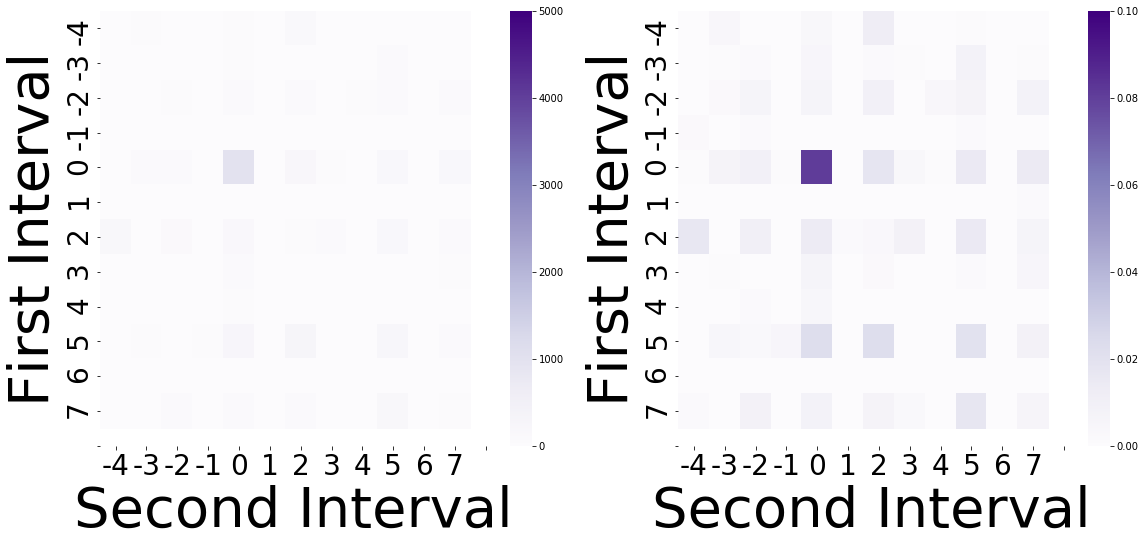

In [122]:
heatmaps,heatmapsrel,chordlens = plot_heatmap_decade(clean_data)

We see that over time, simple ratio become less popular, leaving more popularity to complex ratios

In [125]:
""" 
def plot_heatmap(heatmap_data):
    plt.figure(1, figsize=(19, 8))
        
    plt.subplot(121) # Left plot
    sns.heatmap(heatmap_data, vmin=0, vmax=6,cmap="coolwarm")     
    plt.xticks(np.arange(0.5, 23.5, 1), np.arange(-11, 12))
    plt.yticks(np.arange(0.5, 23.5, 1), np.arange(-11, 12))
    plt.xlabel('Second Interval')
    plt.ylabel('First Interval')
    #plt.axis('off')
    plt.title(f'Heatmap of 1980s - Heatmap of 1990s')

    plt.show()
"""   
def plot_heatmap(heatmap_data):
    plt.figure(1, figsize=(19, 8))
        
    plt.subplot(121) # Left plot
    #sns.heatmap(heatmap_data,center=0,vmin=-3,vmax=3, cmap="coolwarm")
    #sns.heatmap(np.maximum(np.log(heatmap_data), 0),center=0, cmap="coolwarm")
    #sns.heatmap(heatmap_data,center=0,vmin=-0.03,vmax=0.03, cmap="coolwarm") 
    sns.heatmap(heatmap_data,center=0, cmap="coolwarm", vmin=-.04,vmax=.03) 
    plt.xticks(np.arange(0.5, 12.5, 1), np.arange(-4, 8), fontsize=fontsize)#0.5, 23.5, 1 makes the squares in the middle.
    plt.yticks(np.arange(0.5, 12.5, 1), np.arange(-4, 8), fontsize=fontsize)
    plt.xlabel('Second Interval', fontsize=2*fontsize)
    plt.ylabel('First Interval', fontsize=2*fontsize)
    #plt.axis('off')
    #plt.title(f'Heatmap of 1990s - Heatmap of 1980s')

    plt.show()

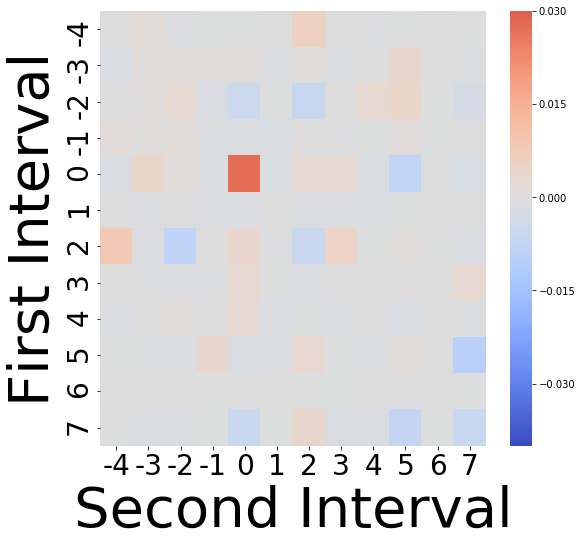

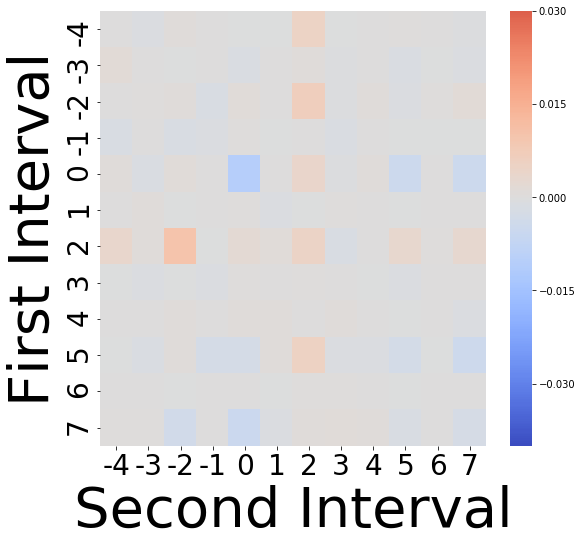

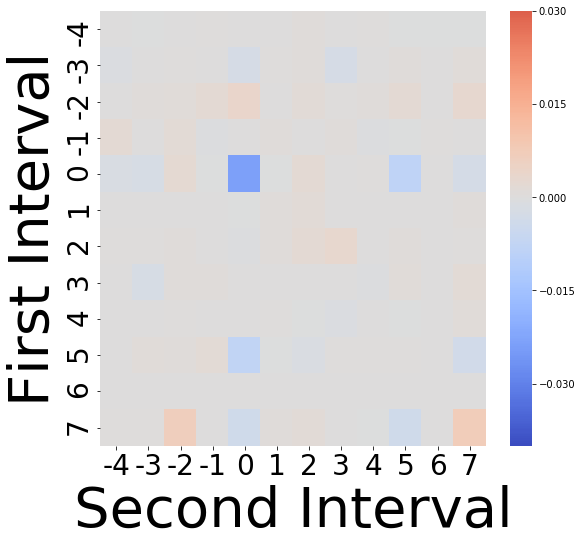

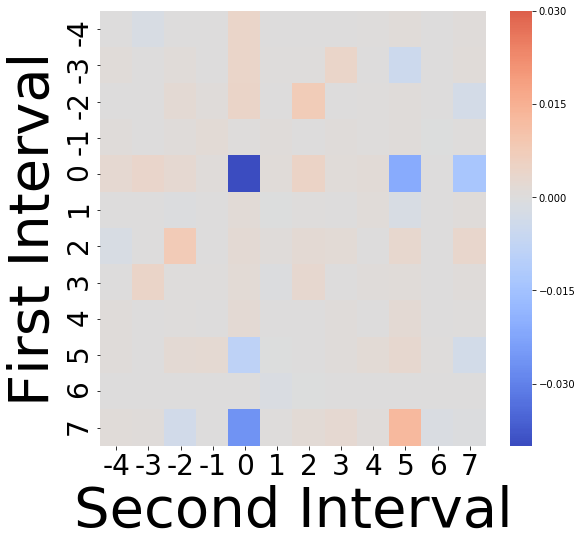

[4472, 48740, 78596, 77076, 12170]


In [126]:
#plot_heatmap(heatmaps[4]-heatmaps[3])
plot_heatmap(heatmapsrel[4]-heatmapsrel[3])
plot_heatmap(heatmapsrel[3]-heatmapsrel[2])
plot_heatmap(heatmapsrel[2]-heatmapsrel[1])
plot_heatmap(heatmapsrel[1]-heatmapsrel[0])
print(chordlens)

We see very well the lose and gain of popularity of simple, respectively complex ratios.

## General function for computing and plotting n-grams with chord information

In [129]:
def plot_full_n_grams(clean_data, ng, n, cycles=True):
    
    """
    This function computes and plots the n-grams of our clean data with chord modes.
    clean_data is our input data
    ng is the number of chords we want in our sequences
    n is the number of n-grams we want to plot
    """
    copyclean=copy.deepcopy(clean_data)
    for elem in copyclean:
        for e in elem[5]:
            e[0]=num2key(e[0])
        
    ngrams = []

    for k in range(890):
        for m in range(copyclean[k][5].shape[0] - ng + 1):
            ngrams.append(tuple([((copyclean[k][5][m+o][0]), copyclean[k][5][m+o][1]) for o in range(ng)]))          

    c_gram = Counter(ngrams)
    
    mc_grams = [c_gram.most_common(n)[k][0] for k in range(n)]
    # for k in range(n):
      #   mc_grams.append(tuple([str(c_gram.most_common(n)[k][m][0][0])+', '+c_gram.most_common(n)[k][m][0][1] for m in range(ng)]))
    
    mc_grams_counts = [c_gram.most_common(n)[k][1] for k in range(n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_grams_counts)
    plt.xticks(np.arange(n), mc_grams)
    plt.xlabel('{}-grams of chords'.format(ng), fontsize=fontsize)
    plt.ylabel('Frequency'.format(ng), fontsize=fontsize)
    #if(cycles==True):
        #plt.title('Most used full {}-gram of chords'.format(ng))
    #else:
        #plt.title('Most used full {}-gram of chords with duplicates removed'.format(ng))
    plt.show()

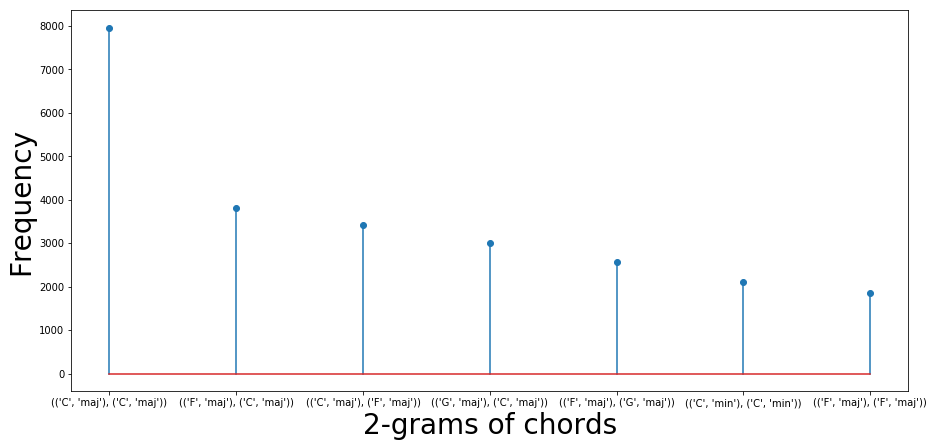

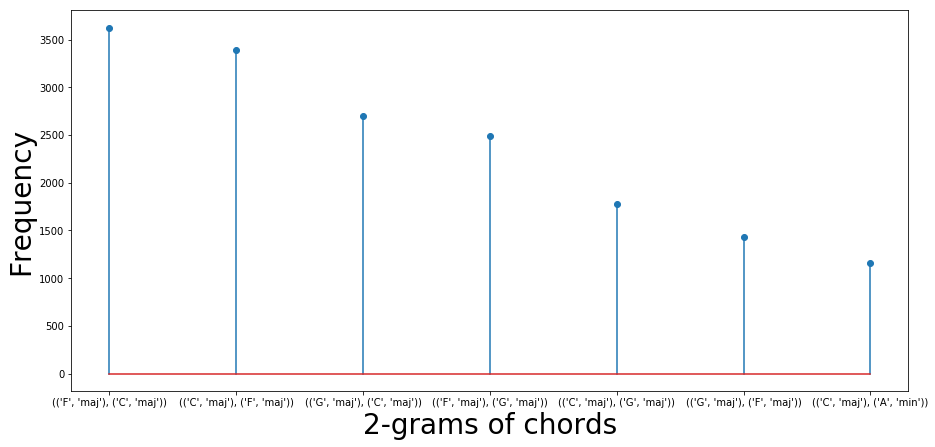

In [130]:
plot_full_n_grams(clean_data, 2, 7)
plot_full_n_grams(removed_duplicates, 2, 7, cycles=False)

# Evolution of popularity of 4-grams of the form {0,5,7,9} over time

In [132]:
from datetime import datetime

def fourgramAGCF(clean_data):
    year24grams = dict()
    # For bigrams, ng = 2
    ng=4

    for elem in clean_data: # populate empty (to have existing keys)
        year = datetime.strptime(elem[1], '%m/%d/%Y').year
        year24grams[year]=list()

    for elem in clean_data: # populate for real
        year = datetime.strptime(elem[1], '%m/%d/%Y').year

        for m in range(elem[5].shape[0] - ng + 1):
            year24grams[year].append(tuple([int(elem[5][m+o][0]) for o in range(ng)]))

    year2chord05 = dict()

    #change everything to sets
    check={0,5,7,9}
    for year in year24grams:
        c=0
        for elem in year24grams[year]:
            otruc=set(elem)
            if otruc==check:
                c+=1
        year2chord05[year] = c / len(year24grams[year])
    
    return year2chord05

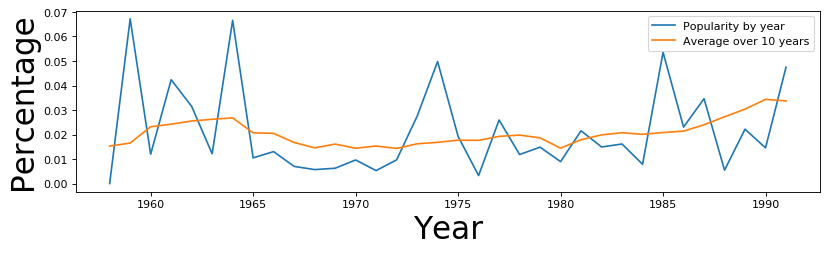

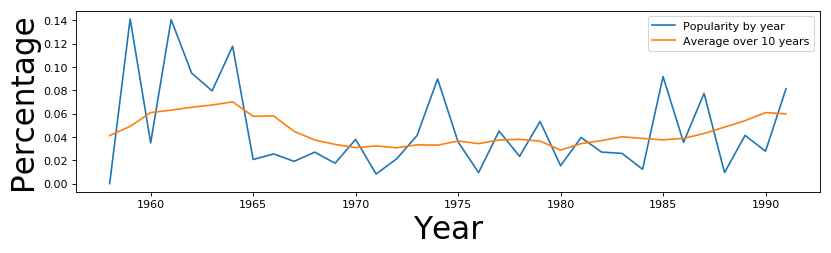

In [135]:
# PLOT

lists = sorted(fourgramAGCF(clean_data).items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, label="Popularity by year")
plt.plot(x, moving_average(y), label="Average over 10 years")

plt.legend()
plt.xlabel('Year', fontsize=fontsize)
plt.ylabel('Percentage', fontsize=fontsize)
# plt.title('Evolution of the popularity of 4-grams of the form {0,5,7,9} over time')

lists = sorted(fourgramAGCF(removed_duplicates).items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, label="Popularity by year")
plt.plot(x, moving_average(y), label="Average over 10 years")

plt.legend()
plt.xlabel('Year', fontsize=fontsize)
plt.ylabel('Percentage', fontsize=fontsize)
# plt.title('Evolution of the popularity of 4-grams of the form {0,5,7,9} over time with duplicates removed')

plt.show()

# Evolution of popularity of 4-grams containing C and A# over time

In [137]:
from datetime import datetime

def fourgramsCAsharp(clean_data):
    year24grams = dict()
    # For bigrams, ng = 2
    ng=2

    for elem in clean_data: # populate empty (to have existing keys)
        year = datetime.strptime(elem[1], '%m/%d/%Y').year
        year24grams[year]=list()

    for elem in clean_data: # populate for real
        year = datetime.strptime(elem[1], '%m/%d/%Y').year

        for m in range(elem[5].shape[0] - ng + 1):
            year24grams[year].append(tuple([int(elem[5][m+o][0]) for o in range(ng)]))

    year2chord05 = dict()

    #change everything to sets
    check={0,10}
    for year in year24grams:
        c=0
        for elem in year24grams[year]:
            otruc=set(elem)
            if otruc==check:
                c+=1
        year2chord05[year] = c / len(year24grams[year])
        
    return year2chord05

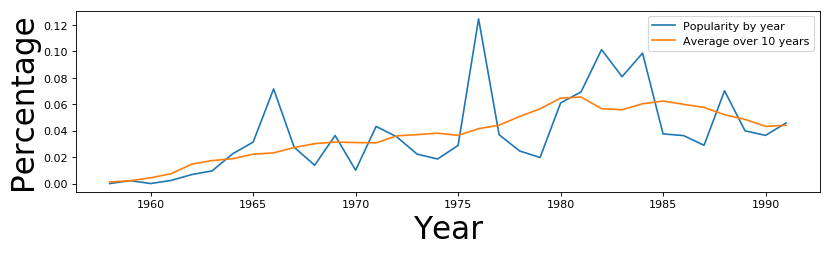

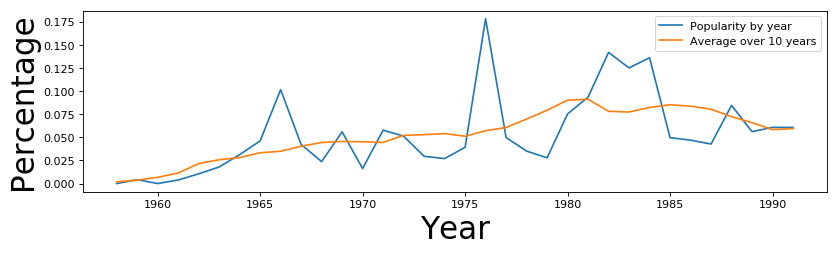

In [139]:
# PLOT

lists = sorted(fourgramsCAsharp(clean_data).items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, label="Popularity by year")
plt.plot(x, moving_average(y), label="Average over 10 years")

plt.legend()
plt.xlabel('Year', fontsize=fontsize)
plt.ylabel('Percentage', fontsize=fontsize)
#plt.title('Evolution of the popularity of 4-grams containing C and A# over time')

lists = sorted(fourgramsCAsharp(removed_duplicates).items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, label="Popularity by year")
plt.plot(x, moving_average(y), label="Average over 10 years")

plt.legend()
plt.xlabel('Year', fontsize=fontsize)
plt.ylabel('Percentage', fontsize=fontsize)
#plt.title('Evolution of the popularity of 4-grams containing C and A# over time with duplicates removed')

plt.show()

# Evolution of popularity of (0,5) = (0,-7) bigram over time

Let us evaluate the popularity of the bigram transition (-7), that is descending fifth or ascending fourth.

We see that the curve is quite similar to the one for the (7,0) bigram. However, this curve encompasses more patterns than the (7,0) bigram only : it takes into account all the bigrams of the form (k+7,k) including (7,0).

Globally, the tendency is that the usage of this transition slightly diminishes over time.

In [140]:
from datetime import datetime

def bigramCF(clean_data):

    year2bigrams = dict()
    # For bigrams, ng = 2
    ng=2

    for elem in clean_data: # populate empty (to have existing keys)
        year = datetime.strptime(elem[1], '%m/%d/%Y').year
        year2bigrams[year]=list()

    for elem in clean_data: # populate for real
        year = datetime.strptime(elem[1], '%m/%d/%Y').year

        for m in range(elem[5].shape[0] - ng + 1):
            year2bigrams[year].append(tuple([int(elem[5][m+o][0]) for o in range(ng)]))

    year2chord05 = dict()

    for year in year2bigrams:
        year2chord05[year] = year2bigrams[year].count(tuple((0,5))) / len(year2bigrams[year])
        
    return year2chord05

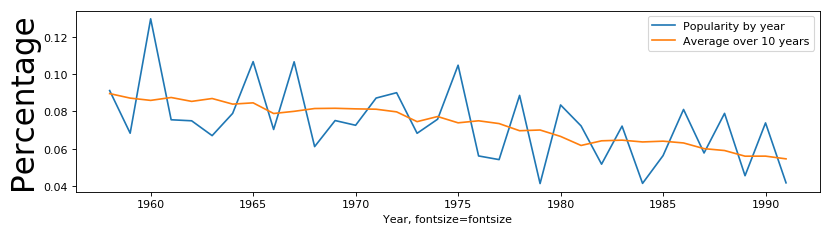

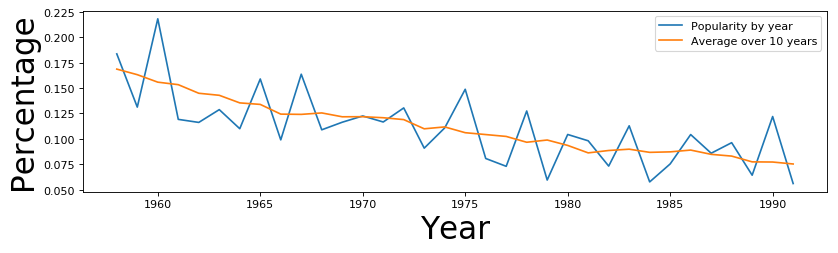

In [141]:
# PLOT

lists = sorted(bigramCF(clean_data).items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, label="Popularity by year")
plt.plot(x, moving_average(y), label="Average over 10 years")

plt.legend()
plt.xlabel('Year, fontsize=fontsize')
plt.ylabel('Percentage', fontsize=fontsize)
#plt.title('Evolution of the popularity of the (0,5) bigram over time')

lists = sorted(bigramCF(removed_duplicates).items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(num=None, figsize=(12, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, label="Popularity by year")
plt.plot(x, moving_average(y), label="Average over 10 years")

plt.legend()
plt.xlabel('Year', fontsize=fontsize)
plt.ylabel('Percentage', fontsize=fontsize)
#plt.title('Evolution of the popularity of the (0,5) bigram over time with duplicates removed')

plt.show()

This pattern corresponds to the transition from the Root to the Fourth : this is either an ascending fourth transition or a descending fifth.

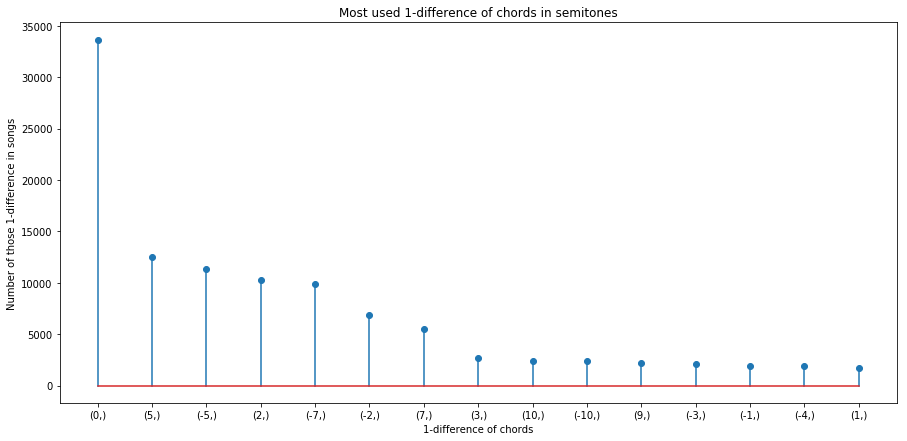

In [44]:
plot_diff_grams(clean_data, 2, 15)

# Most popular chords coming from and leading to the Root with duplicates

In [142]:
def chords_leading_root(big, n, cycles=True):
    
    bigrams_to_root = []
    for k in range(len(big)):
        if big[k][1] == 0:
            bigrams_to_root.append(big[k][0])
            
    c_bi_r = Counter(bigrams_to_root)

    mc_bigrams = [c_bi_r.most_common(n)[k][0] for k in range(n)]
    mc_bigrams_counts = [c_bi_r.most_common(n)[k][1] for k in range(n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_bigrams_counts)
    plt.xticks(np.arange(n), mc_bigrams)
    plt.xlabel('Chord leading to the root', fontsize=fontsize)
    plt.ylabel('Number of those chords in songs', fontsize=fontsize)
    #if(cycles==True):
        #plt.title('Most used chords leading to the root')
    #else:
        #plt.title('Most used chords leading to the root with duplicates removed')
    plt.show()

In [143]:
def chords_from_root(big, n, cycles=True):
    
    bigrams_from_root = []
    for k in range(len(big)):
        if big[k][0] == 0:
            bigrams_from_root.append(big[k][1])
            
    c_bi_f = Counter(bigrams_from_root)

    mc_bigrams = [c_bi_f.most_common(n)[k][0] for k in range(n)]
    mc_bigrams_counts = [c_bi_f.most_common(n)[k][1] for k in range(n)]
    
    plt.figure(1, figsize=(15,7))

    plt.stem(np.arange(n),mc_bigrams_counts)
    plt.xticks(np.arange(n), mc_bigrams)
    plt.xlabel('Chord coming from the root', fontsize=fontsize)
    plt.ylabel('Number of those chords in songs', fontsize=fontsize)
    #if (cycles==True):
        #plt.title('Most used chords coming from the root')
    #else:
        #plt.title('Most used chords coming from the root with duplicates removed')
    plt.show()

Logically, we see that the most frequent chords that lead to a root chord are root chords, fourths and fifths.

After that, we have the minor seventh and the second.

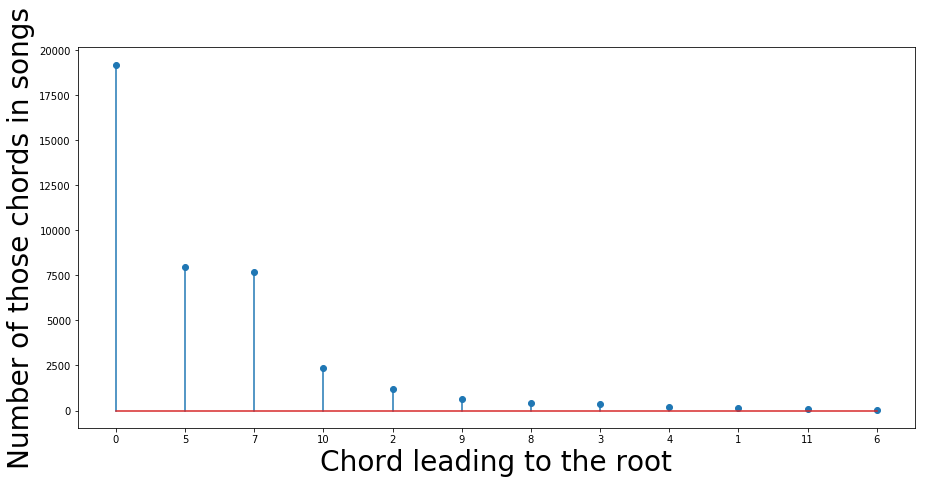

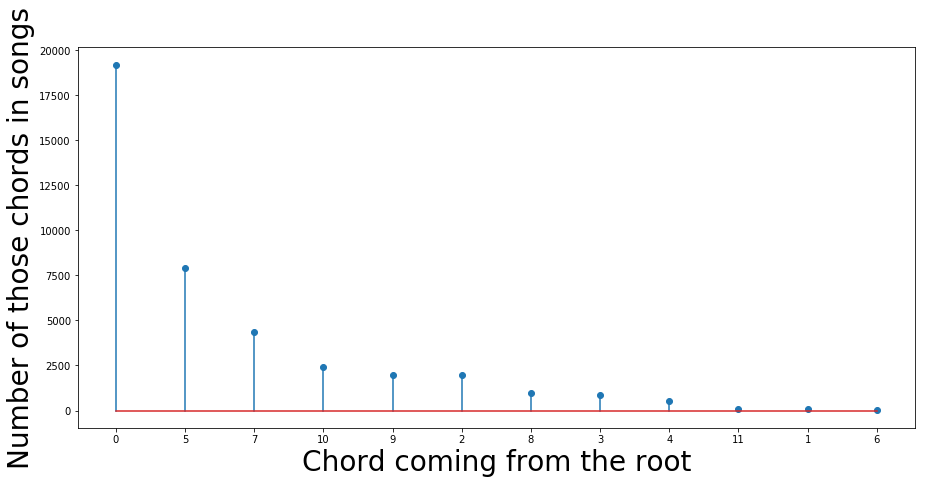

In [144]:
bigrams = [(int(clean_data[k][5][m][0]), int(clean_data[k][5][m+1][0])) for k in range(890) for m in range(clean_data[k][5].shape[0] - 1) ]
chords_leading_root(bigrams, 12)
chords_from_root(bigrams, 12)

Same as before : we see the same repartition of chords that come from the root than for the ones leading to the root. 

## Most popular chords coming from and leading to the Root with **NO** duplicates

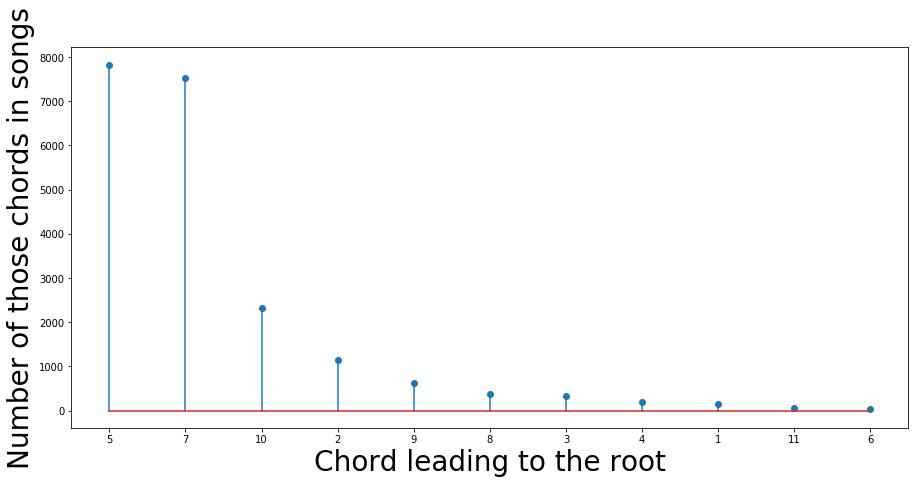

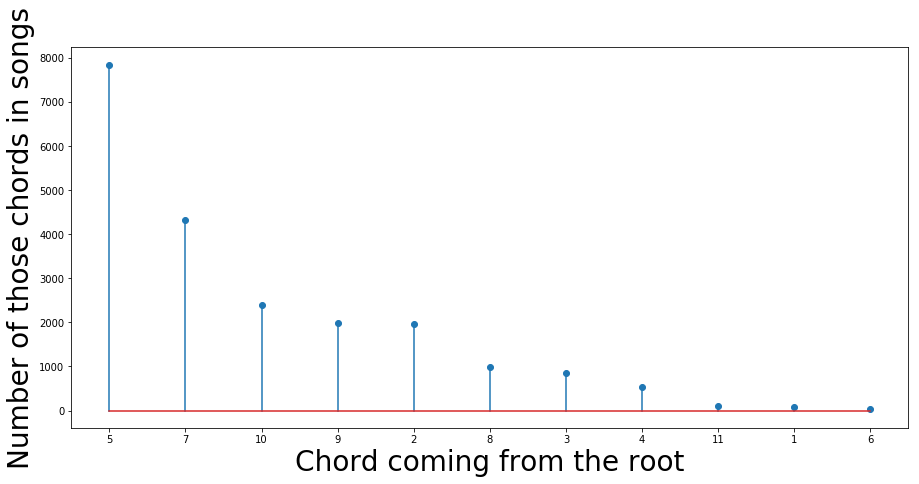

In [145]:
bigrams2 = [(int(removed_duplicates[k][5][m][0]), int(removed_duplicates[k][5][m+1][0])) for k in range(890) for m in range(removed_duplicates[k][5].shape[0] - 1) ]
chords_leading_root(bigrams2, 11, cycles=False)
chords_from_root(bigrams2, 11, cycles=False)

# Popularity of modes over years

In [146]:
# Modes with their chords : https://en.wikipedia.org/wiki/Roman_numeral_analysis
"""
previous modes:
ionian = np.array(( np.array(('0', "maj")), np.array(('0', "maj7")), np.array(('2', "min")), np.array(('2', "7")),np.array(('4', "min")), np.array(('4', "7")), np.array(('5', "maj")), np.array(('5', "maj7")), np.array(('7', "maj")), np.array(('7', "7")), np.array(('9', "min")), np.array(('9', "7")), np.array(('11', "min")), np.array(('11', "dim")), np.array(('11', "7"))))
dorian = np.array(( np.array(('0', "min")), np.array(('0', "7")), np.array(('2', "min")), np.array(('2', "7")),np.array(('3', "maj")), np.array(('3', "maj7")), np.array(('5', "maj")), np.array(('5', "7")), np.array(('7', "min")), np.array(('7', "7")), np.array(('9', "min")), np.array(('9', "7")), np.array(('10', "maj7")), np.array(('10', "maj"))))
phrygian = np.array(( np.array(('0', "min")), np.array(('0', "7")), np.array(('1', "maj")), np.array(('1', "maj7")),np.array(('3', "maj")), np.array(('3', "7")), np.array(('5', "min")), np.array(('5', "7")), np.array(('7', "min")), np.array(('7', "7")), np.array(('8', "maj")), np.array(('8', "maj7")), np.array(('10', "min")), np.array(('10', "7"))))
lydian = np.array(( np.array(('0', "maj")), np.array(('0', "maj7")), np.array(('2', "maj")), np.array(('2', "maj7")),np.array(('4', "min")), np.array(('4', "7")), np.array(('6', "min")), np.array(('6', "7")), np.array(('7', "maj")), np.array(('7', "maj7")), np.array(('9', "min")), np.array(('9', "7")), np.array(('11', "min")), np.array(('11', "7"))))
mixolydian = np.array(( np.array(('0', "maj")), np.array(('0', "7")), np.array(('2', "min")), np.array(('2', "7")),np.array(('4', "min")),np.array(('4', "dim")), np.array(('4', "7")), np.array(('5', "maj")), np.array(('5', "maj7")), np.array(('7', "min")), np.array(('7', "7")), np.array(('9', "min")), np.array(('9', "7")), np.array(('10', "maj")), np.array(('10', "maj7"))))
aeolian = np.array(( np.array(('0', "min")), np.array(('0', "7")), np.array(('2', "min")), np.array(('2', "7")), np.array(('2', "dim")), np.array(('3', "maj")), np.array(('3', "maj7")), np.array(('5', "min")), np.array(('5', "7")), np.array(('7', "min")), np.array(('7', "7")), np.array(('8', "maj")), np.array(('8', "maj7")), np.array(('10', "maj")), np.array(('10', "maj7"))))
locrian = np.array(( np.array(('0', "min")), np.array(('0', "dim")), np.array(('0', "7")), np.array(('1', "maj")), np.array(('1', "maj7")),np.array(('3', "min")), np.array(('3', "7")), np.array(('5', "min")), np.array(('5', "7")), np.array(('6', "maj")), np.array(('6', "maj7")), np.array(('8', "maj")), np.array(('8', "maj7")), np.array(('10', "min")), np.array(('10', "7"))))
"""

ionian = np.array(( np.array(('0', "maj")), np.array(('0', "maj7")), np.array(('2', "min")), np.array(('2', "min7")),np.array(('4', "min")), np.array(('4', "min7")), np.array(('5', "maj")), np.array(('5', "maj7")), np.array(('7', "maj")), np.array(('7', "7")), np.array(('9', "min")), np.array(('9', "min7")), np.array(('11', "min")), np.array(('11', "dim")), np.array(('11', "7"))))
dorian = np.array(( np.array(('0', "min")), np.array(('0', "min7")), np.array(('2', "min")), np.array(('2', "min7")),np.array(('3', "maj")), np.array(('3', "maj7")), np.array(('5', "maj")), np.array(('5', "7")), np.array(('7', "min")), np.array(('7', "min7")), np.array(('9', "min")), np.array(('9', "dim")), np.array(('10', "maj7")), np.array(('10', "maj"))))
phrygian = np.array(( np.array(('0', "min")), np.array(('0', "min7")), np.array(('1', "maj")), np.array(('1', "maj7")),np.array(('3', "maj")), np.array(('3', "7")), np.array(('5', "min")), np.array(('5', "min7")), np.array(('7', "min")), np.array(('7', "dim")), np.array(('8', "maj")), np.array(('8', "maj7")), np.array(('10', "min")), np.array(('10', "min7"))))
lydian = np.array(( np.array(('0', "maj")), np.array(('0', "maj7")), np.array(('2', "maj")), np.array(('2', "maj7")),np.array(('4', "min")), np.array(('4', "min7")), np.array(('6', "min")), np.array(('6', "dim")), np.array(('7', "maj")), np.array(('7', "maj7")), np.array(('9', "min")), np.array(('9', "min7")), np.array(('11', "min")), np.array(('11', "min7"))))
mixolydian = np.array(( np.array(('0', "maj")), np.array(('0', "7")), np.array(('2', "min")), np.array(('2', "min7")),np.array(('4', "min")),np.array(('4', "dim")), np.array(('5', "maj")), np.array(('5', "maj7")), np.array(('7', "min")), np.array(('7', "min7")), np.array(('9', "min")), np.array(('9', "min7")), np.array(('10', "maj")), np.array(('10', "maj7"))))
aeolian = np.array(( np.array(('0', "min")), np.array(('0', "min7")), np.array(('2', "min")), np.array(('2', "7")), np.array(('2', "dim")), np.array(('3', "maj")), np.array(('3', "maj7")), np.array(('5', "min")), np.array(('5', "min7")), np.array(('7', "min")), np.array(('7', "min7")), np.array(('8', "maj")), np.array(('8', "maj7")), np.array(('10', "maj")), np.array(('10', "maj7"))))
locrian = np.array(( np.array(('0', "min")), np.array(('0', "dim")), np.array(('0', "7")), np.array(('1', "maj")), np.array(('1', "maj7")),np.array(('3', "min")), np.array(('3', "min7")), np.array(('5', "min")), np.array(('5', "7")), np.array(('6', "maj")), np.array(('6', "maj7")), np.array(('8', "maj")), np.array(('8', "maj7")), np.array(('10', "min")), np.array(('10', "min7"))))

allmode=np.concatenate((ionian,dorian,phrygian,lydian,mixolydian,aeolian,locrian),axis=0)

# Data structure conversion
ionian = list(map(tuple, ionian))
dorian = list(map(tuple, dorian))
phrygian = list(map(tuple, phrygian))
lydian = list(map(tuple, lydian))
mixolydian = list(map(tuple, mixolydian))
aeolian = list(map(tuple, aeolian))
locrian = list(map(tuple, locrian))

In [147]:
def song_mode(chords, mode):
    '''
    Function to compute proportion of chords in a song, that belong to the given mode.
    '''
    match_chords = 0
    for chord in chords:
        if(chord in mode):
            match_chords += 1
            
    if(len(chords)==0):
        return 0

    return match_chords/len(chords)

def year2mode(clean_data, mode):
    '''
    Function to compute the average % utilisation of a mode over the years
    '''
    from datetime import datetime
    year2ionian = dict()

    for elem in clean_data: # populate empty (to have existing keys)
        year = datetime.strptime(elem[1], '%m/%d/%Y').year
        year2ionian[year]=list()

    for elem in clean_data: # populate for real
        year = datetime.strptime(elem[1], '%m/%d/%Y').year
        year2ionian[year].append(song_mode(list(map(tuple, elem[5])), mode))

    for year in year2ionian: # computing the means for each year
        year2ionian[year] = np.mean(year2ionian[year])
        
    return year2ionian

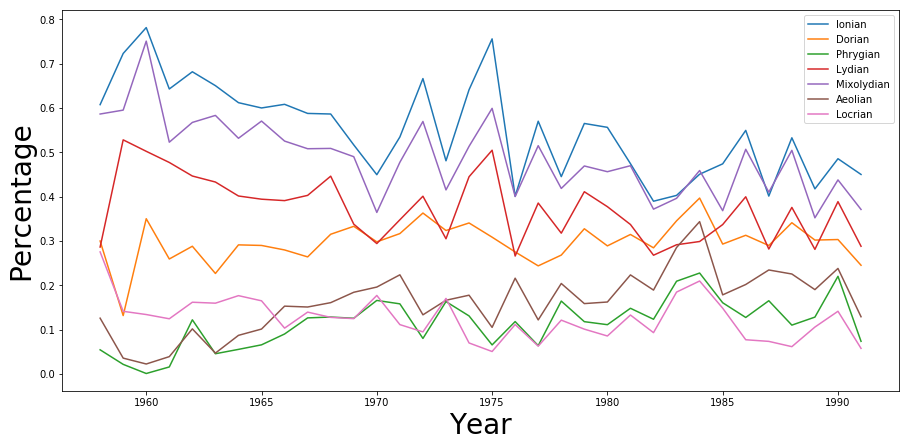

In [148]:
# Dictionaries of year to mode proportions
year2ionian = year2mode(clean_data, ionian)
year2dorian = year2mode(clean_data, dorian)
year2phrygian = year2mode(clean_data, phrygian)
year2lydian = year2mode(clean_data, lydian)
year2mixolydian = year2mode(clean_data, mixolydian)
year2aeolian = year2mode(clean_data, aeolian)
year2locrian = year2mode(clean_data, locrian)

year2all=year2mode(clean_data, allmode)
    
# plotting
plt.figure(1, figsize=(15,7))

lists = sorted(year2ionian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Ionian')

lists = sorted(year2dorian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Dorian')

lists = sorted(year2phrygian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Phrygian')

lists = sorted(year2lydian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Lydian')

lists = sorted(year2mixolydian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Mixolydian')

lists = sorted(year2aeolian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Aeolian')

lists = sorted(year2locrian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Locrian')

plt.legend()
plt.xlabel('Year', fontsize=fontsize)
plt.ylabel('Percentage', fontsize=fontsize)
#plt.title('Evolution of the usage of modes over time in pop music')
plt.show()

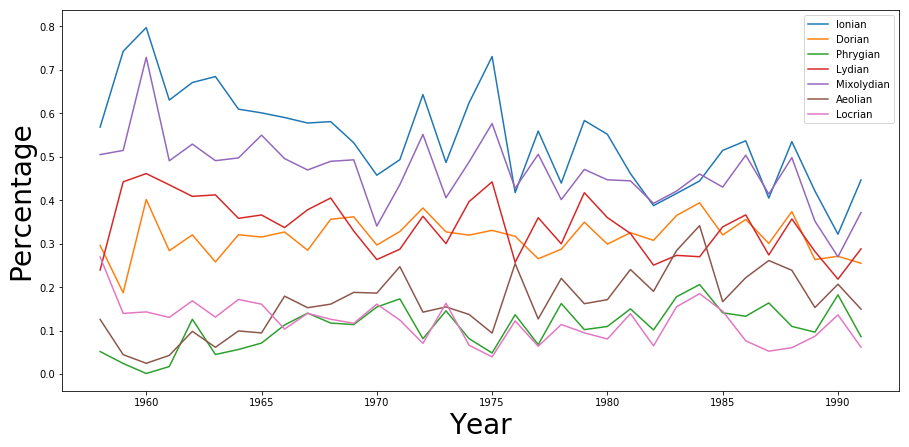

In [149]:
# Dictionaries of year to mode proportions
year2ionian = year2mode(removed_duplicates, ionian)
year2dorian = year2mode(removed_duplicates, dorian)
year2phrygian = year2mode(removed_duplicates, phrygian)
year2lydian = year2mode(removed_duplicates, lydian)
year2mixolydian = year2mode(removed_duplicates, mixolydian)
year2aeolian = year2mode(removed_duplicates, aeolian)
year2locrian = year2mode(removed_duplicates, locrian)

year2all=year2mode(removed_duplicates, allmode)
    
# plotting
plt.figure(1, figsize=(15,7))

lists = sorted(year2ionian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Ionian')

lists = sorted(year2dorian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Dorian')

lists = sorted(year2phrygian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Phrygian')

lists = sorted(year2lydian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Lydian')

lists = sorted(year2mixolydian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Mixolydian')

lists = sorted(year2aeolian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Aeolian')

lists = sorted(year2locrian.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y, label='Locrian')

plt.legend()
plt.xlabel('Year', fontsize=fontsize)
plt.ylabel('Percentage', fontsize=fontsize)
#plt.title('Evolution of the usage of modes over time in pop music with duplicates removed')
plt.show()

# Are songs becoming less major, less minor (diatonically speaking, not caring about chords) ?

In [150]:
major = list(('0', '2', '4', '5', '7', '9', '11'))
minor = list(('0', '2', '3', '5', '7', '9', '10'))
majorminor = list(('0', '2', '3', '4', '5', '7', '9', '10', '11'))

In [151]:
def song_majmin(chords, mode):
    '''
    Function to compute proportion of chords not in given major/minor scheme
    '''
    match_chords = 0
    for chord in chords:
        if(chord[0] not in mode):
            match_chords += 1
            
    if(len(chords)==0):
        return 0

    return match_chords/len(chords)

def year2majmin(clean_data, mode):
    '''
    Function to compute the average % utilisation of a maj/min over the years
    '''
    from datetime import datetime
    year2ionian = dict()

    for elem in clean_data: # populate empty (to have existing keys)
        year = datetime.strptime(elem[1], '%m/%d/%Y').year
        year2ionian[year]=list()

    for elem in clean_data: # populate for real
        year = datetime.strptime(elem[1], '%m/%d/%Y').year
        year2ionian[year].append(song_majmin(list(map(tuple, elem[5])), mode))

    for year in year2ionian: # computing the means for each year
        year2ionian[year] = np.mean(year2ionian[year])
        
    return year2ionian

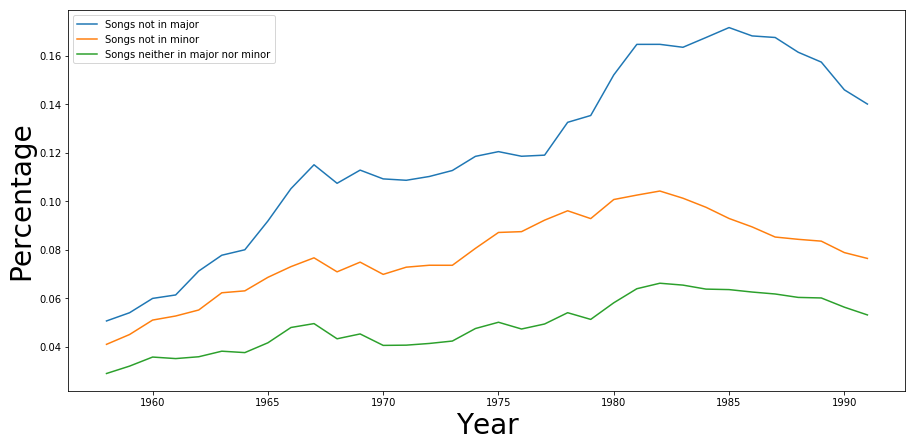

In [152]:
# Dictionaries of year to mode proportions
year2notmajor = year2majmin(clean_data, major)
year2notminor = year2majmin(clean_data, minor)
year2notmajorminor = year2majmin(clean_data, majorminor)

# plotting
plt.figure(1, figsize=(15,7))

lists = sorted(year2notmajor.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, moving_average(y), label='Songs not in major')

lists = sorted(year2notminor.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, moving_average(y), label='Songs not in minor')

lists = sorted(year2notmajorminor.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, moving_average(y), label='Songs neither in major nor minor')


plt.legend()
plt.xlabel('Year', fontsize=fontsize)
plt.ylabel('Percentage', fontsize=fontsize)
#plt.title('Evolution of the usage of modes over time in pop music')
plt.show()

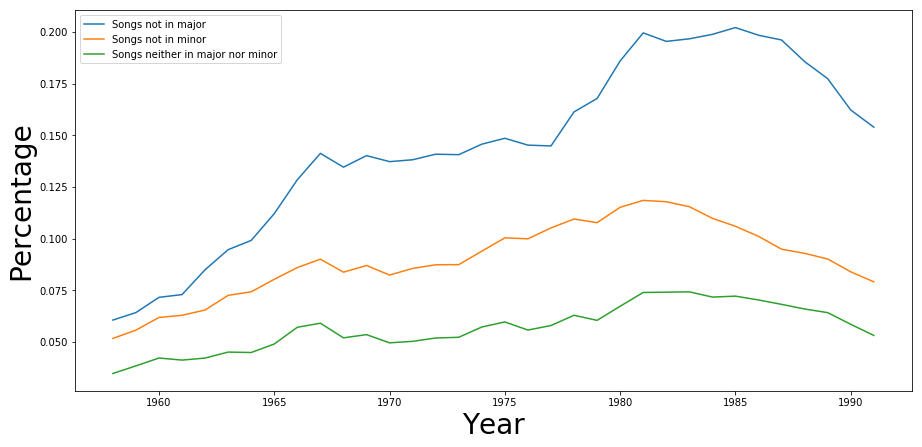

In [153]:
# Dictionaries of year to mode proportions
year2notmajor = year2majmin(removed_duplicates, major)
year2notminor = year2majmin(removed_duplicates, minor)
year2notmajorminor = year2majmin(removed_duplicates, majorminor)

# plotting
plt.figure(1, figsize=(15,7))

lists = sorted(year2notmajor.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, moving_average(y), label='Songs not in major')

lists = sorted(year2notminor.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, moving_average(y), label='Songs not in minor')

lists = sorted(year2notmajorminor.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, moving_average(y), label='Songs neither in major nor minor')

plt.legend()
plt.xlabel('Year', fontsize=fontsize)
plt.ylabel('Percentage', fontsize=fontsize)
#plt.title('Evolution of the usage of modes over time in pop music wih duplicates removed')
plt.show()

less major YES, but less minor bof bof

# Pattern Extractor

In [ ]:
"""
Verse and chorus chord pattern extraction:

we compute all ngrams possible in verses and chorus, then among ngrams which are the most common, we save the ones with the highest n.
chorus chords become chorus ngrams

we check at the time we select the ngrams, if they have anything in common with the current ngrams :
this way we delete each them one by one

"""

patterns =[]
patternsfailed=[]
both = []# all passed patterns
for elem in clean_data :

    for i in range(2,elem[6].shape[0]) :
    
        for m in range(elem[6].shape[0] - i + 1): 
            
            ngram= tuple([(int(elem[6][m+o][0]), elem[6][m+o][1]) for o in range(i)])  
            
            if ngram in (both) :
                patterns.append(ngram)

        both.append(ngram) #here the ngram is added to the patterns that we compare with.
        #this means that if the ngram happens again in the same song, it is not taken into account

    #same for verses:
    for i in range(2,elem[7].shape[0]):
        for m in range(elem[7].shape[0] - i + 1):
            ngram= tuple([(int(elem[7][m+o][0]), elem[7][m+o][1]) for o in range(i)])  
            
            if ngram in (both) :
                patterns.append(ngram)

        both.append(ngram)

print(len(patterns))

In [ ]:
np.save('../dataset/allpatterns.npy', patterns) #the code is quite long to run, therefore it is easier to save it and reuse it.


## Subpattern Removal: 
## We remove the patterns fully contained in other patterns

In [ ]:
def patternbelongs(patbig,patsmall):
    if len(patbig) > len(patsmall):
        i=len(patsmall)
        ngrams=[]
        for m in range(len(patbig) - i + 1): #we first create all the ngrams of size same as small pattern frompatbig
            ngrams.append(tuple([(int(patbig[m+o][0]), patbig[m+o][1]) for o in range(i)]))
        return patsmall in ngrams
    else:
        return False


In [ ]:
#checking if patternbelongs works

patsmall=((0, 'maj'),(5, 'maj'))
patbigbad=((5, 'maj'),(0, 'maj'),(0, 'maj'))
patbiggood=((0, 'maj'),(0, 'maj'),(5, 'maj'))

print(patternbelongs(patbigbad,patsmall))
print(patternbelongs(patbiggood,patsmall))

In [ ]:
#removing subpatterns
print(len(patterns))

for patbig in patterns:
    for patsmall in patterns:
        if patternbelongs(patbig,patsmall):
            del patsmall
print(len(patterns))

In [ ]:
#plots to compare with our initial ngrams:

really_plot_ngrams(patterns,10,4)

In [ ]:
c_gram=Counter(fourgrampatterns)
print(c_gram.most_common(10))
mc_grams=[]
mc_grams =[c_gram.most_common(10)[k][0] for k in range(10)]
print(len(mc_grams))